Імпорт бібліотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

Дізнаємось все потрібне про датасет як у 2 лабі

In [2]:
DatasetTrain = pd.read_csv('train.csv')

In [3]:
print(DatasetTrain.shape)
DatasetTrain.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(DatasetTrain.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
DatasetTrain[DatasetTrain.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [6]:
DatasetTrain.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Подивимось на стовпці по порядку. Ім'я у кожного пасажира унікальне - отже даний стовпчик для кластеризації не потрібен

In [7]:
DatasetTrain = DatasetTrain.drop("Name", axis=1)

В стовпці Cabin забагато пропущених значень, а серед наявних дуже багато унікальних

In [8]:
DatasetTrain = DatasetTrain.drop("Cabin", axis=1)

Схожа ситуація і з квитками. Якщо їх кодувати модель буде перевантажена ознаками

In [9]:
DatasetTrain = DatasetTrain.drop("Ticket", axis=1)

З таблички бачимо, що мода стовпця Embarked - S. Замінимо парочку пропущених значень на неї

In [10]:
DatasetTrain["Embarked"].fillna("S", inplace=True)

Також відносно небагато пропущених значень у стовпці з віком. Замінимо і їх на моду

In [11]:
DatasetTrain["Age"].fillna(DatasetTrain["Age"].mean(), inplace=True)

<AxesSubplot: >

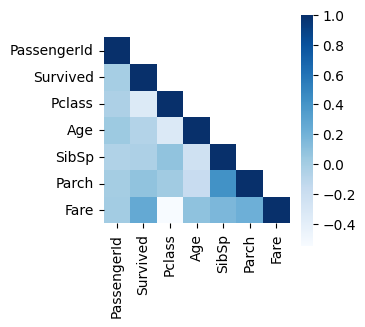

In [12]:
CorrMatrix = DatasetTrain.corr(numeric_only = True)
mask = np.array(CorrMatrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(3, 3)
sns.heatmap(CorrMatrix, cmap = "Blues", mask = mask, square = True)

З кореляціями все ОК

Далі будемо кодувати текстові дані і власне кластеризувати трьома різними методами

In [13]:
emb = DatasetTrain[["Embarked"]]
OneHotEnc = OneHotEncoder()
LabelEnc = LabelEncoder()
DatasetTrain["Sex"] = LabelEnc.fit_transform(DatasetTrain["Sex"])
emb_OneHotEnc = OneHotEnc.fit_transform(emb).toarray()
DatasetTrain = DatasetTrain.join(pd.DataFrame(emb_OneHotEnc, columns=OneHotEnc.get_feature_names_out(["Embarked"])))
DatasetTrain.drop(["Embarked"], axis=1, inplace=True)

In [14]:
x = DatasetTrain.iloc[:, 1:]
SS = StandardScaler()
x = SS.fit_transform(x)

<AxesSubplot: xlabel='Fare', ylabel='Age'>

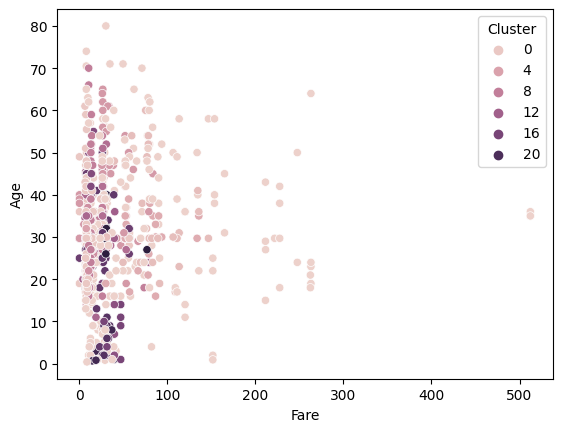

In [15]:
DBS = DBSCAN(eps=1)
DBS.fit(x)
label = DBS.labels_
DatasetTrain["Cluster"] = label
sns.scatterplot(data=DatasetTrain, x="Fare", y="Age", hue="Cluster")

Скоріш за все eps замалий

<AxesSubplot: xlabel='Fare', ylabel='Age'>

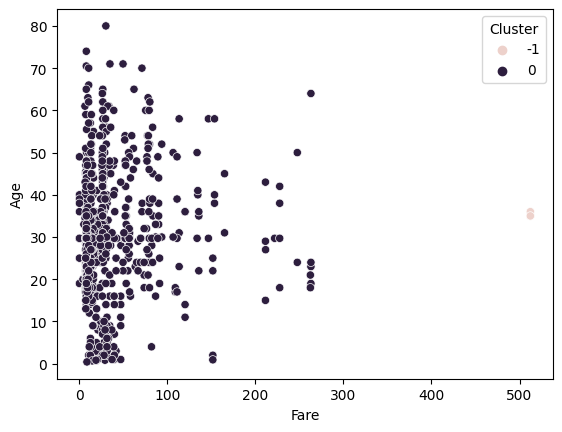

In [16]:
DBS = DBSCAN(eps=5)
DBS.fit(x)
label = DBS.labels_
DatasetTrain["Cluster"] = label
sns.scatterplot(data=DatasetTrain, x="Fare", y="Age", hue="Cluster")

А тепер завеликий

<AxesSubplot: xlabel='Fare', ylabel='Age'>

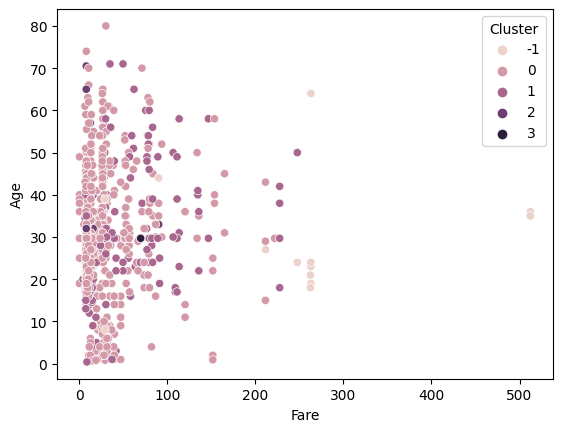

In [18]:
DBS = DBSCAN(eps=2.5)
DBS.fit(x)
label = DBS.labels_
DatasetTrain["Cluster"] = label
sns.scatterplot(data=DatasetTrain, x="Fare", y="Age", hue="Cluster")

Вже краще

<AxesSubplot: xlabel='Fare', ylabel='Age'>

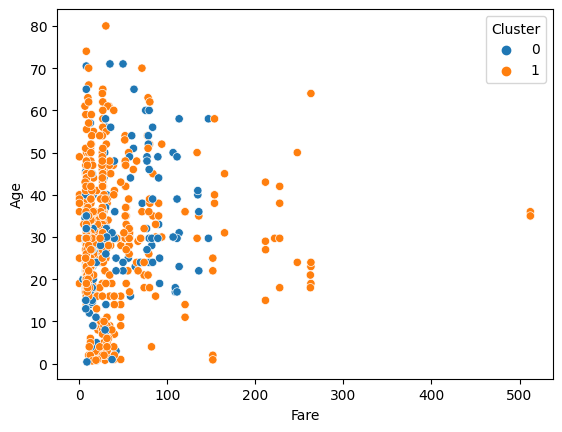

In [19]:
AglClust = AgglomerativeClustering(n_clusters=2)
AglClust.fit(x)
label = AglClust.labels_
DatasetTrain["Cluster"] = label
sns.scatterplot(data=DatasetTrain, x="Fare", y="Age", hue="Cluster")

<AxesSubplot: xlabel='Fare', ylabel='Age'>

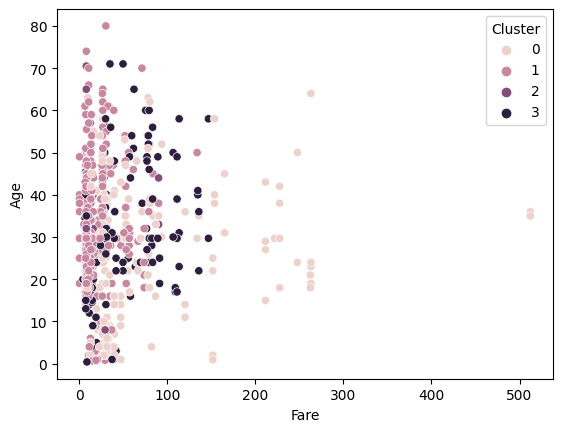

In [20]:
AglClust = AgglomerativeClustering(n_clusters=4)
AglClust.fit(x)
label = AglClust.labels_
DatasetTrain["Cluster"] = label
sns.scatterplot(data=DatasetTrain, x="Fare", y="Age", hue="Cluster")

<AxesSubplot: xlabel='Fare', ylabel='Age'>

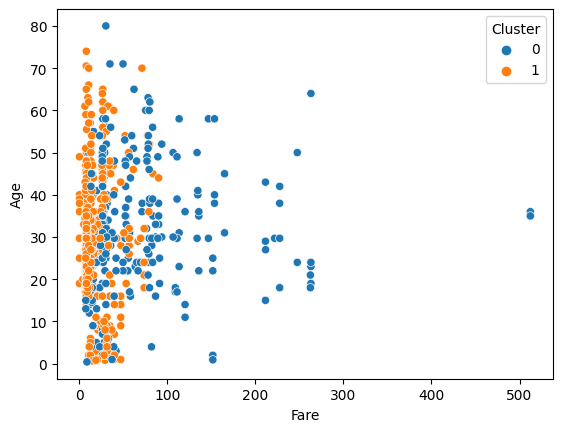

In [21]:
kMean = KMeans(n_clusters=2,random_state=42, n_init="auto")
kMean.fit(x)
label = kMean.labels_
DatasetTrain["Cluster"] = label
sns.scatterplot(data=DatasetTrain, x="Fare", y="Age", hue="Cluster")

<AxesSubplot: xlabel='Fare', ylabel='Age'>

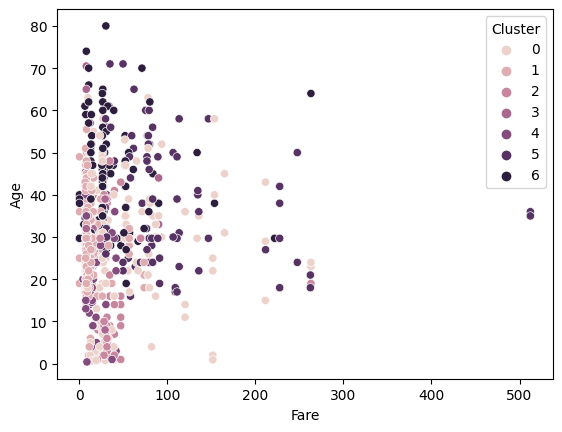

In [22]:
kMean = KMeans(n_clusters=7, random_state=42, n_init="auto")
kMean.fit(x)
label = kMean.labels_ 
DatasetTrain["Cluster"] = label
sns.scatterplot(data=DatasetTrain, x="Fare", y="Age", hue="Cluster")

<AxesSubplot: xlabel='Fare', ylabel='Age'>

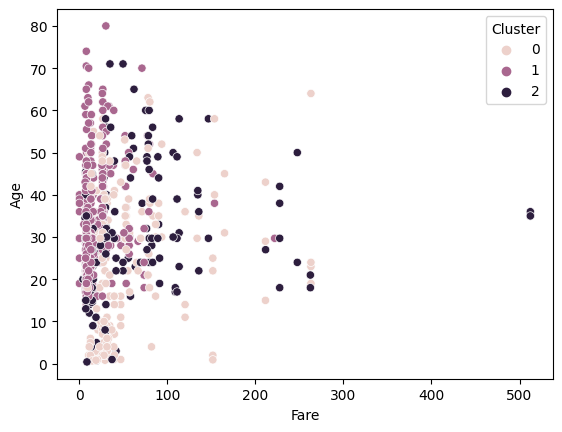

In [23]:
kMean = KMeans(n_clusters=3, random_state=42, n_init="auto")
kMean.fit(x)
label = kMean.labels_ 
DatasetTrain["Cluster"] = label
sns.scatterplot(data=DatasetTrain, x="Fare", y="Age", hue="Cluster")

Хоч якось можливо розділити кластери візуально на цих зображеннях коли їх мало

Виконаємо ту ж послідовність дій з тестовими даними

In [24]:
DatasetTest = pd.read_csv('test.csv')

In [25]:
print(DatasetTest.shape)
DatasetTest.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
print(DatasetTest.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [27]:
DatasetTest[DatasetTest.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [28]:
DatasetTest.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


Бачимо що є деякі missing values, але дублікатів чи інших пошкоджених даних не спостерігається. Перевіримо також кореляції про всяк випадок

<AxesSubplot: >

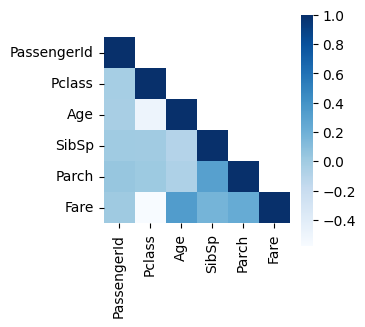

In [30]:
CorrMatrix = DatasetTest.corr(numeric_only=True)
mask = np.array(CorrMatrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(3, 3)
sns.heatmap(CorrMatrix, cmap = "Blues", mask = mask, square = True)

In [31]:
DatasetTest = DatasetTest.drop("Name", axis=1)

In [32]:
DatasetTest = DatasetTest.drop("Cabin", axis=1)

In [33]:
DatasetTest = DatasetTest.drop("Ticket", axis=1)

In [34]:
DatasetTest["Age"].fillna(DatasetTest["Age"].mean(), inplace=True)

In [35]:
DatasetTest["Fare"].fillna(DatasetTest["Fare"].mean(), inplace=True)

In [36]:
emb = DatasetTest[["Embarked"]]
DatasetTest["Sex"] = LabelEnc.fit_transform(DatasetTest["Sex"])
emb_OneHotEnc = OneHotEnc.fit_transform(emb).toarray()
DatasetTest = DatasetTest.join(pd.DataFrame(emb_OneHotEnc, columns=OneHotEnc.get_feature_names_out(["Embarked"])))
DatasetTest.drop(["Embarked"], axis=1, inplace=True)

In [37]:
x = DatasetTest.iloc[:, 1:]
SS = StandardScaler()
x = SS.fit_transform(x)

А тепер кластеризуємо з плюс-мінус гарними параметрами

<AxesSubplot: xlabel='Fare', ylabel='Age'>

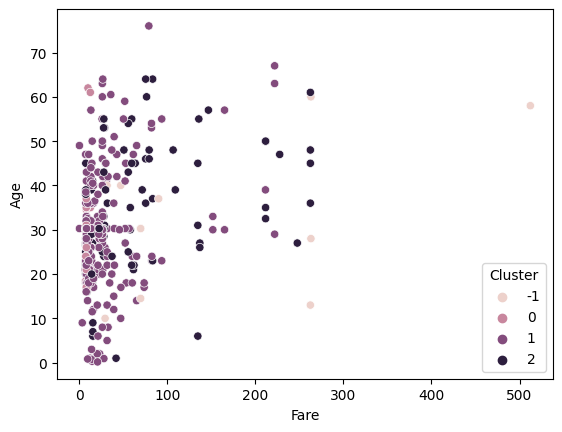

In [38]:
DBS = DBSCAN(eps=2.5)
DBS.fit(x)
label = DBS.labels_
DatasetTest["Cluster"] = label
sns.scatterplot(data=DatasetTest, x="Fare", y="Age", hue="Cluster")

<AxesSubplot: xlabel='Fare', ylabel='Age'>

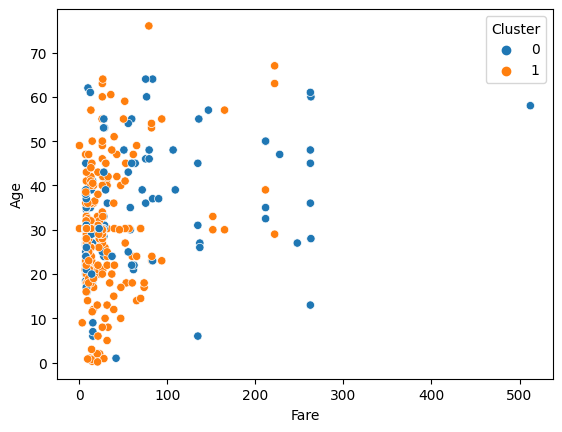

In [39]:
AglClust = AgglomerativeClustering(n_clusters=2)
AglClust.fit(x)
label = AglClust.labels_
DatasetTest["Cluster"] = label
sns.scatterplot(data=DatasetTest, x="Fare", y="Age", hue="Cluster")

<AxesSubplot: xlabel='Fare', ylabel='Age'>

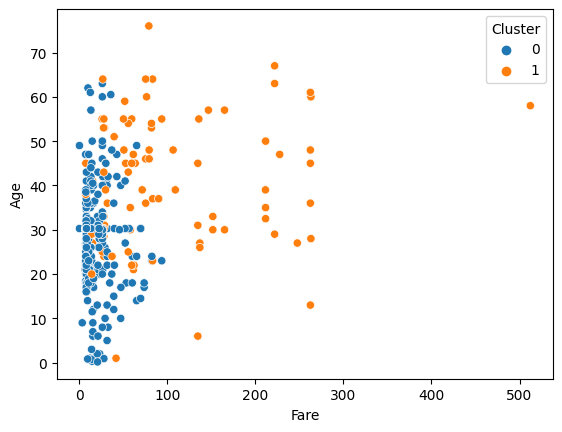

In [40]:
kMean = KMeans(n_clusters=2, random_state=42, n_init="auto")
kMean.fit(x)
label = kMean.labels_
DatasetTest["Cluster"] = label
sns.scatterplot(data=DatasetTest, x="Fare", y="Age", hue="Cluster")